In [1]:
import pandas as pd              #import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv") #load file from github 
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.Sex.unique() # in df data set Sex column having categorical data need to transform in numric data 

array(['M', 'F', 'I'], dtype=object)

In [4]:
df.Sex.value_counts()    

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [6]:
df.isnull().sum() #there is no null values or missing values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


<AxesSubplot:>

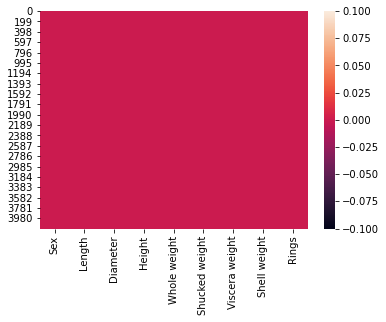

In [8]:
sns.heatmap(df.isnull()) #heatmap shown graphicaly there is no null values precent in dataset

In [9]:
df.dtypes #There is sex column is object we need to convert in binary by using encoding 

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [10]:
df.shape # The shape od data is 9 columns and 4177 rows

(4177, 9)

### Statistics

In [11]:
df.describe() 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observations:
    Mean of height column is greater then median.hence it is right skewed.
    similar with whole weight /shucked weightit means data spread is high
    high gap between 75th percentile and max is present inrings.so few outliers is present

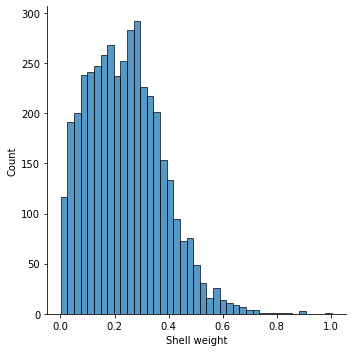

In [12]:
sns.displot(df['Shell weight'])

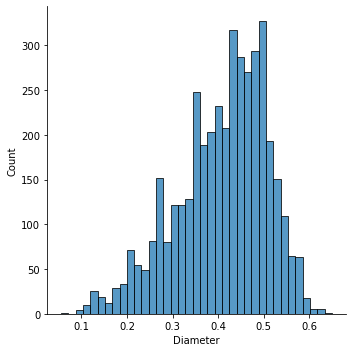

In [13]:
sns.displot(df['Diameter']) # Reight skewed data 

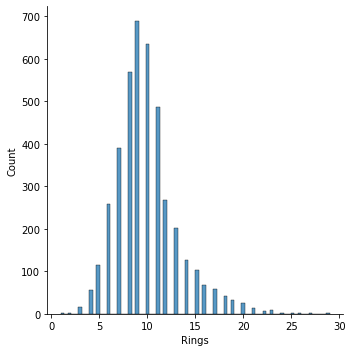

In [14]:
sns.displot(df['Rings'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

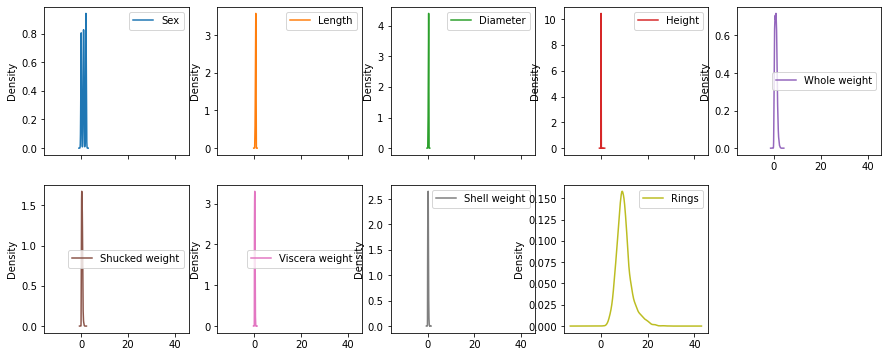

In [15]:
df.plot(kind='kde',subplots=True,layout=(2,5),figsize=(15,6))

In [16]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [17]:
import numpy as np
#df['Height']=np.log(df['Height'])

df['Height']=np.sqrt(df['Height']) # Remove skewness by using log trasfomation or square root trasformation 
                                    #Height column having heigh skewness so minimize height skewness
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

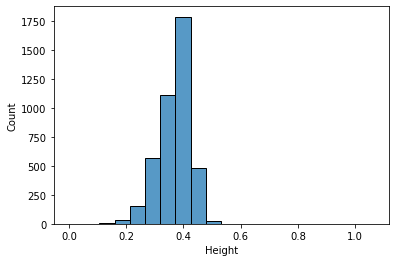

In [18]:
sns.histplot(df['Height'],bins=20)

### Delecting Outliers:

Sex                  AxesSubplot(0.125,0.125;0.0731132x0.755)
Length            AxesSubplot(0.212736,0.125;0.0731132x0.755)
Diameter          AxesSubplot(0.300472,0.125;0.0731132x0.755)
Height            AxesSubplot(0.388208,0.125;0.0731132x0.755)
Whole weight      AxesSubplot(0.475943,0.125;0.0731132x0.755)
Shucked weight    AxesSubplot(0.563679,0.125;0.0731132x0.755)
Viscera weight    AxesSubplot(0.651415,0.125;0.0731132x0.755)
Shell weight      AxesSubplot(0.739151,0.125;0.0731132x0.755)
Rings             AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

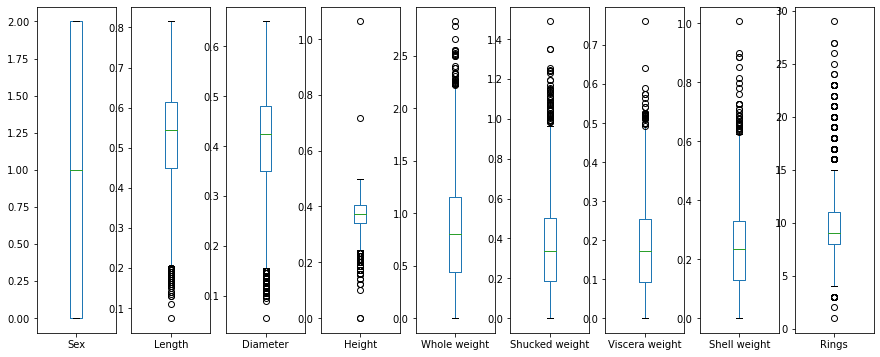

In [19]:
df.plot(kind='box',subplots=True,figsize=(15,6))

Observation:
    Height ,Length,Shell weight having high outlier 

<AxesSubplot:>

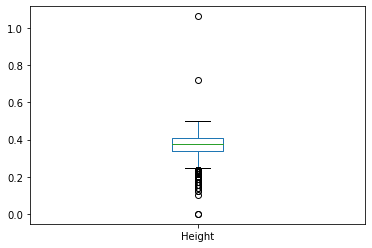

In [20]:
df['Height'].plot.box()

<AxesSubplot:>

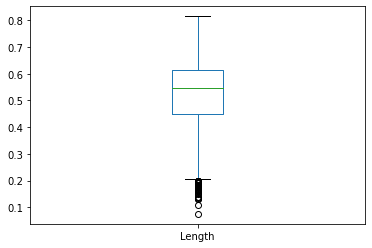

In [21]:
df['Length'].plot.box()

<AxesSubplot:>

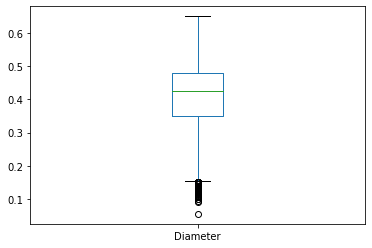

In [22]:
df['Diameter'].plot.box()

<AxesSubplot:>

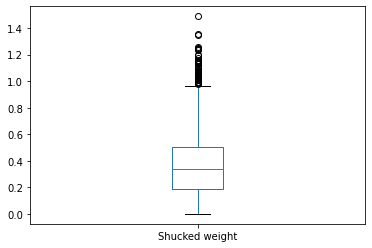

In [23]:
df['Shucked weight'].plot.box()

In [24]:
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))     #Removeing outlier by using zscore Technique 
print(np.where(dfzscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [25]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)


df=dfnew

dfnew.shape= (4019, 9)


In [26]:
df.corr() # sex columns are negatively correlated with Rings

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
Shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
Viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings,-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


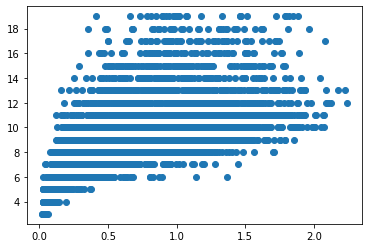

In [27]:
plt.scatter(df['Whole weight'],df['Rings']) # Whole Weight are highly correlated with Rings

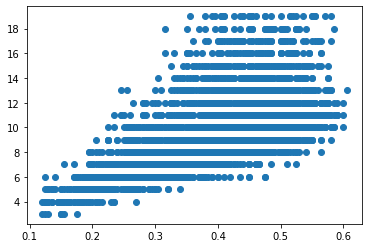

In [28]:
plt.scatter(df['Diameter'],df['Rings']) #Diameter are highly correlated with Rings

<AxesSubplot:>

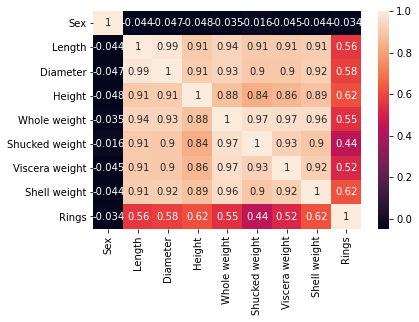

In [29]:
sns.heatmap(df.corr(),annot=True)

#Observation:
    #Diameter and Height are highly correllated with rings as well as whole weight and Shucked weight are lightly high correleted.

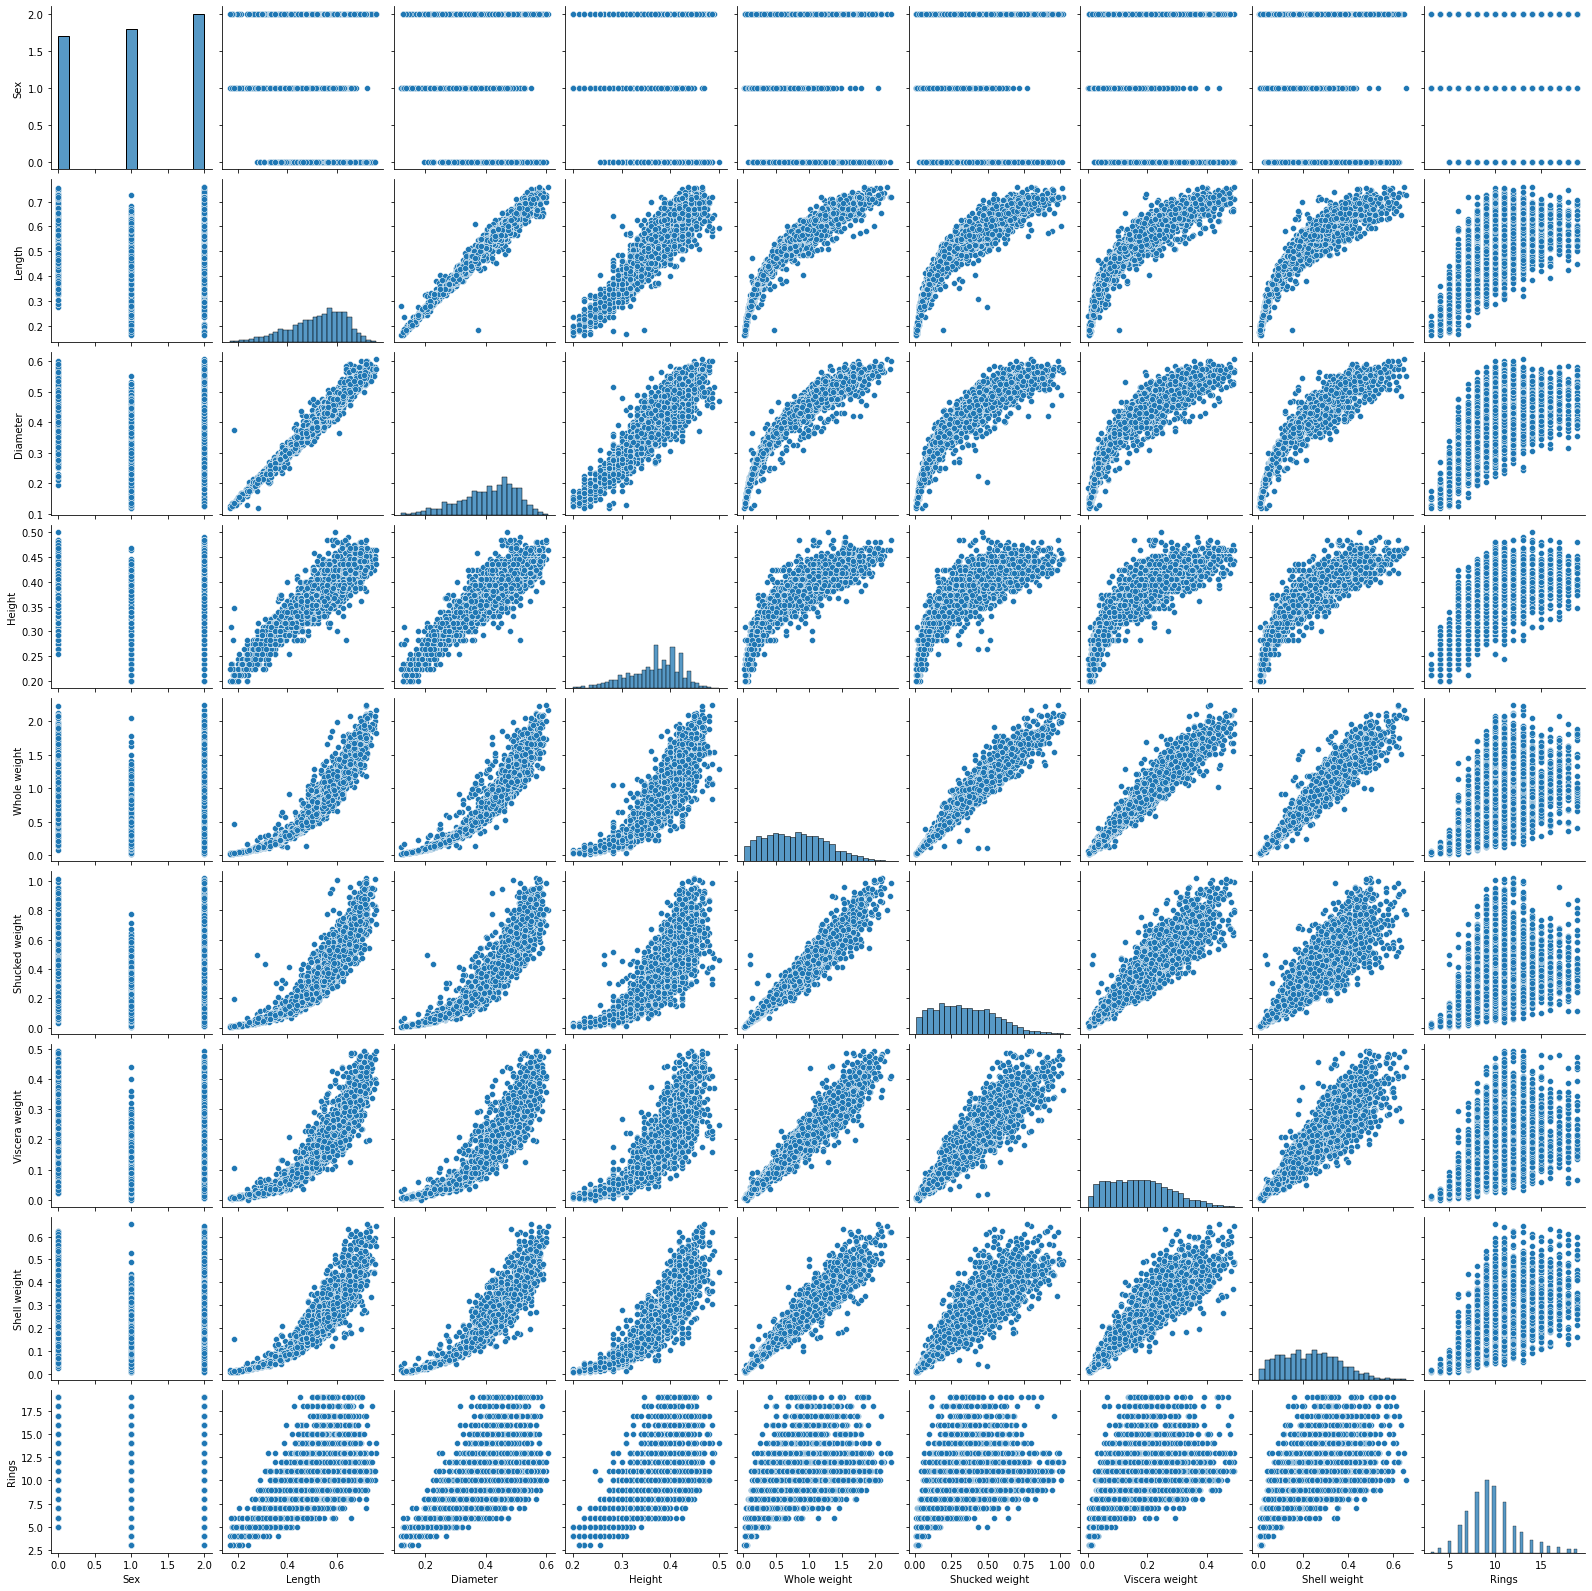

In [30]:
sns.pairplot(df)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [34]:
x.shape

(4019, 8)

In [35]:
x.shape[1]

8

In [36]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4019, dtype: int64

In [37]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [38]:
vif_calc()

   VIF Factor        Features
0    2.632493             Sex
1  802.340579          Length
2  763.963727        Diameter
3  154.948351          Height
4  441.891678    Whole weight
5  110.275122  Shucked weight
6   65.499021  Viscera weight
7   92.744708    Shell weight


Data Cleasing

Future Engineering -------Selection Future /variables/columns

Detect Outlier/Remove.

#### Diameter is having high  correlation 0.58 as compare to  Length  0.56 so we drop Length 
#### Whole weight is having high correlation 0.55 as compare to Shucked weight 0.44 so we remove Shucked weight 

In [39]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [40]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.308221,0.5140,0.1010,0.1500,15
1,2,0.265,0.300000,0.2255,0.0485,0.0700,7
2,0,0.420,0.367423,0.6770,0.1415,0.2100,9
3,2,0.365,0.353553,0.5160,0.1140,0.1550,10
4,1,0.255,0.282843,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490,11
4173,2,0.440,0.367423,0.9660,0.2145,0.2605,10
4174,2,0.475,0.452769,1.1760,0.2875,0.3080,9
4175,0,0.485,0.387298,1.0945,0.2610,0.2960,10


In [41]:
x=df.iloc[:,:-1]

In [42]:
x.shape

(4019, 6)

In [43]:
vif_calc()

   VIF Factor        Features
0    2.623184             Sex
1  207.507326        Diameter
2  131.432133          Height
3  140.572357    Whole weight
4   60.762342  Viscera weight
5   58.911776    Shell weight


<AxesSubplot:>

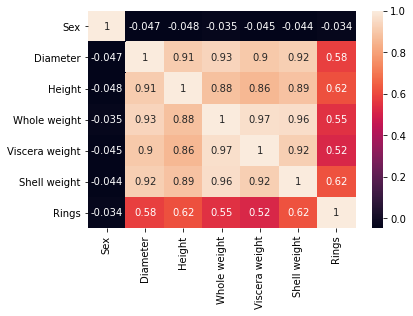

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
x=df.iloc[:,0:-1]

In [46]:
x.shape

(4019, 6)

In [47]:
y.shape

(4019,)

In [48]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15835802, -0.42766545, -1.1645936 , -0.63693837, -0.7267137 ,
        -0.63462928],
       [ 1.15835802, -1.4770503 , -1.32420851, -1.27043818, -1.23554834,
        -1.26104553],
       [-1.28480172,  0.14949622, -0.01509984, -0.27901646, -0.33418412,
        -0.1648171 ],
       ...,
       [ 1.15835802,  0.72665788,  1.64199279,  0.81670767,  1.08086078,
         0.60254279],
       [-1.28480172,  0.83159637,  0.37079505,  0.63774671,  0.82402043,
         0.50858036],
       [ 1.15835802,  1.56616576,  1.4248959 ,  2.51299401,  1.94345664,
         2.06679076]])

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=55)

In [50]:
print(x.shape,x_train.shape,y_test.shape)

(4019, 6) (2813, 6) (1206,)


In [51]:
print(y.shape,y_train.shape,y_test.shape)

(4019,) (2813,) (1206,)


In [52]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 0.00840657,  0.36149019,  1.02282032, -2.76538666,  0.13076611,
        3.07787733])

In [53]:
features=['Sex', 'Diameter', 'Height', 'Whole weight', 'Viscera weight','Shell weight']

list(zip(lr.coef_,features))

[(0.008406569042269142, 'Sex'),
 (0.3614901886399505, 'Diameter'),
 (1.0228203212380835, 'Height'),
 (-2.7653866611053055, 'Whole weight'),
 (0.13076611122676457, 'Viscera weight'),
 (3.0778773281253833, 'Shell weight')]

In [54]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Sex,0.008407
Diameter,0.361490
Height,1.022820
Whole weight,-2.765387
Viscera weight,0.130766
Shell weight,3.077877


In [55]:
lr.intercept_

9.780269356675209

In [56]:
lr.score(x_train,y_train)

0.46367716121560787

In [57]:
pred=lr.predict(x_test)
pred

array([12.11331063, 11.61504384,  9.61650377, ..., 10.38679789,
        9.70195901, 10.88035602])

In [58]:
print("Predicted values",pred)

Predicted values [12.11331063 11.61504384  9.61650377 ... 10.38679789  9.70195901
 10.88035602]


In [59]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,12.113311
1,11.615044
2,9.616504
3,10.017946
4,10.587250
...,...
1201,5.959364
1202,11.950754
1203,10.386798
1204,9.701959


In [60]:
lr.score(x_test,y_test)

0.42899509023721416

In [61]:
print("mean absolute error::",mean_absolute_error(y_test,pred))
print("Mean squared error ::",mean_squared_error(y_test,pred))
print("Root Mean square::",np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error:: 1.5985286611387985
Mean squared error :: 4.538196137382711
Root Mean square:: 2.130304235874001


In [62]:
print("R2 score ::",r2_score(y_test,pred))

R2 score :: 0.42899509023721416


In [63]:
t=np.array([2,.365,0.095,0.5140,0.1010,0.1500])

In [64]:
t=t.reshape(1,-1)

In [65]:
lr.predict(t)

array([9.07967458])

In [66]:
from sklearn.svm import SVR

In [67]:
svr0=SVR(kernel='linear')
svr0.fit(x_train,y_train)
svr0.score(x_train,y_train)
pred0=svr0.predict(x_test)
print(svr0.score(x_train,y_train))

0.4358249068132294


In [68]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
predy=svr.predict(x_test)
print(svr.score(x_train,y_train))

0.4944271700751568


In [69]:
svr1=SVR(kernel='poly')
svr1.fit(x_train,y_train)
svr1.score(x_train,y_train)
pred1=svr1.predict(x_test)
print(svr1.score(x_train,y_train))

0.35118842037312714


### Try to minimize the coefficient variance

In [70]:
from sklearn.linear_model import Lasso,Ridge

In [71]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.46367698288314974

In [72]:
rd=Ridge(alpha=10)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.4629296126941149

### Cross validation SCore

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
score=cross_val_score(svr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.21830521 0.46772418 0.43349275 0.49245967 0.5172689 ]
0.42585014099170754
0.10740666733914614


### Saving Best Model

In [75]:
import pickle
filename='Abalone.pkl'
pickle.dump(svr,open(filename,'wb'))

### Conclusion

In [76]:
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,12,12.113311
1,10,11.615044
2,9,9.616504
3,9,10.017946
4,9,10.587250
...,...,...
1201,5,5.959364
1202,10,11.950754
1203,8,10.386798
1204,10,9.701959
